<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE499/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE499/Dataset.csv')

In [ ]:
df.head()

,Customer ID,Gender,Age,City Code,Product Code,Total Bill (Taka),Customer Value
0,1,Female,19,3.0,9,9120,1
1,2,Female,27,4.0,2,6110,1
2,3,Female,34,2.0,4,7010,0
3,4,Female,42,2.0,6,10710,0
4,5,Female,33,16.0,8,7620,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Customer ID        5000 non-null   int64
 1   Gender             5000 non-null   int64
 2   Age                5000 non-null   int64
 3   City Code          5000 non-null   int64
 4   Product Code       5000 non-null   int64
 5   Total Bill (Taka)  5000 non-null   int64
 6   Customer Value     5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [ ]:
df['Customer Value'].value_counts()

0    3463
1    1537
Name: Customer Value, dtype: int64

In [ ]:
df.describe()

,Customer ID,Gender,Age,City Code,Product Code,Total Bill (Taka),Customer Value
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.129800,35.649400,5.107400,5.366000,7751.598000,0.307400
std,1443.520003,0.336117,8.314776,6.066566,2.861692,1583.736289,0.461463
min,1.000000,0.000000,19.000000,0.000000,1.000000,5669.000000,0.000000
25%,1250.750000,0.000000,28.000000,0.000000,3.000000,6570.000000,0.000000
50%,2500.500000,0.000000,36.000000,2.000000,5.000000,7300.000000,0.000000
75%,3750.250000,0.000000,43.000000,10.000000,8.000000,9120.000000,1.000000
max,5000.000000,1.000000,50.000000,21.000000,10.000000,10710.000000,1.000000


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'City Code'}>,
        <Axes: title={'center': 'Product Code'}>,
        <Axes: title={'center': 'Total Bill (Taka)'}>],
       [<Axes: title={'center': 'Customer Value'}>, <Axes: >, <Axes: >]],
      dtype=object)

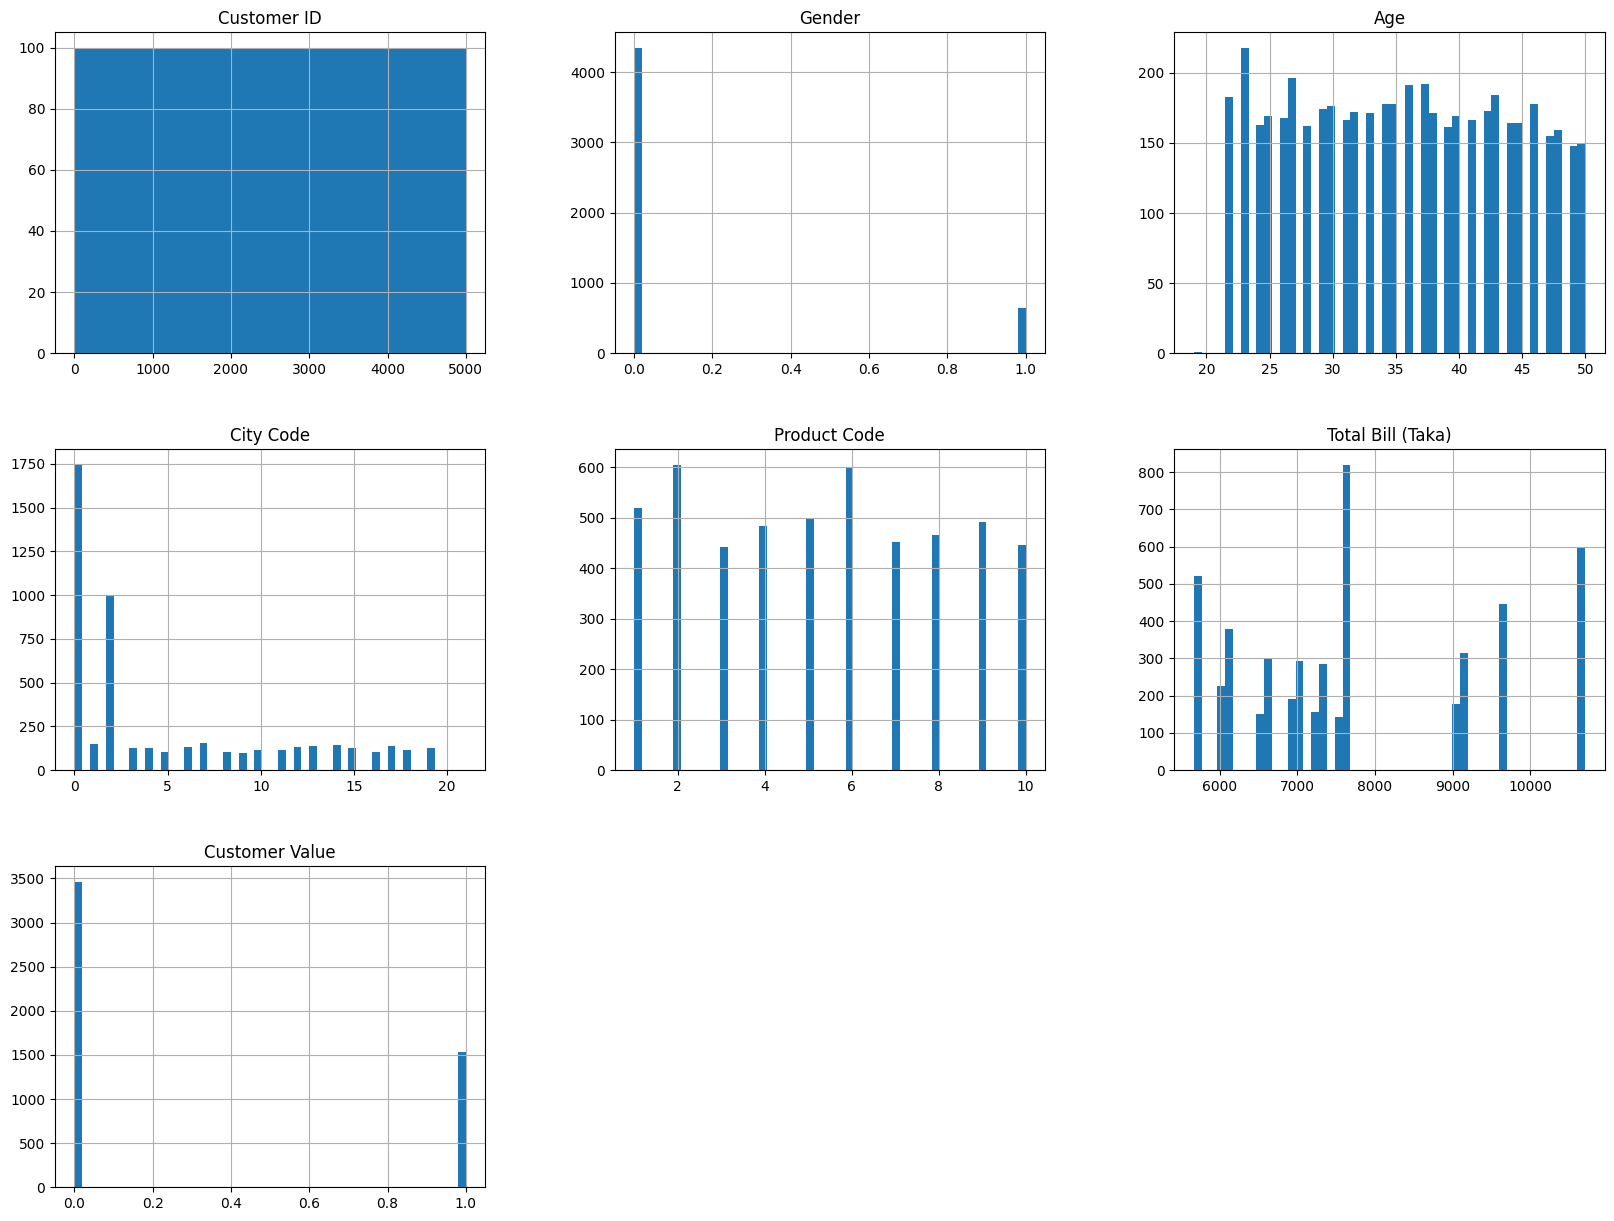

In [ ]:
df.hist(bins=50, figsize=(20, 15))

In [ ]:
# For learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 4000
Rows in test set: 1000



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Customer Value']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set['Customer Value'].value_counts()

0    693
1    307
Name: Customer Value, dtype: int64

In [ ]:
strat_train_set['Customer Value'].value_counts()

0    2770
1    1230
Name: Customer Value, dtype: int64

In [ ]:
df = strat_train_set.copy()

In [ ]:
corr_matrix = df.corr()
corr_matrix['Total Bill (Taka)'].sort_values(ascending=False)

Total Bill (Taka)    1.000000
Product Code         0.679158
City Code            0.021008
Customer Value       0.018627
Customer ID          0.002182
Gender              -0.015360
Age                 -0.015751
Name: Total Bill (Taka), dtype: float64

array([[<Axes: xlabel='Total Bill (Taka)', ylabel='Total Bill (Taka)'>,
        <Axes: xlabel='Gender', ylabel='Total Bill (Taka)'>,
        <Axes: xlabel='Age', ylabel='Total Bill (Taka)'>,
        <Axes: xlabel='City Code', ylabel='Total Bill (Taka)'>,
        <Axes: xlabel='Product Code', ylabel='Total Bill (Taka)'>],
       [<Axes: xlabel='Total Bill (Taka)', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='City Code', ylabel='Gender'>,
        <Axes: xlabel='Product Code', ylabel='Gender'>],
       [<Axes: xlabel='Total Bill (Taka)', ylabel='Age'>,
        <Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='City Code', ylabel='Age'>,
        <Axes: xlabel='Product Code', ylabel='Age'>],
       [<Axes: xlabel='Total Bill (Taka)', ylabel='City Code'>,
        <Axes: xlabel='Gender', ylabel='City Code'>,
        <Axes: xlabel='Age', ylabel='Ci

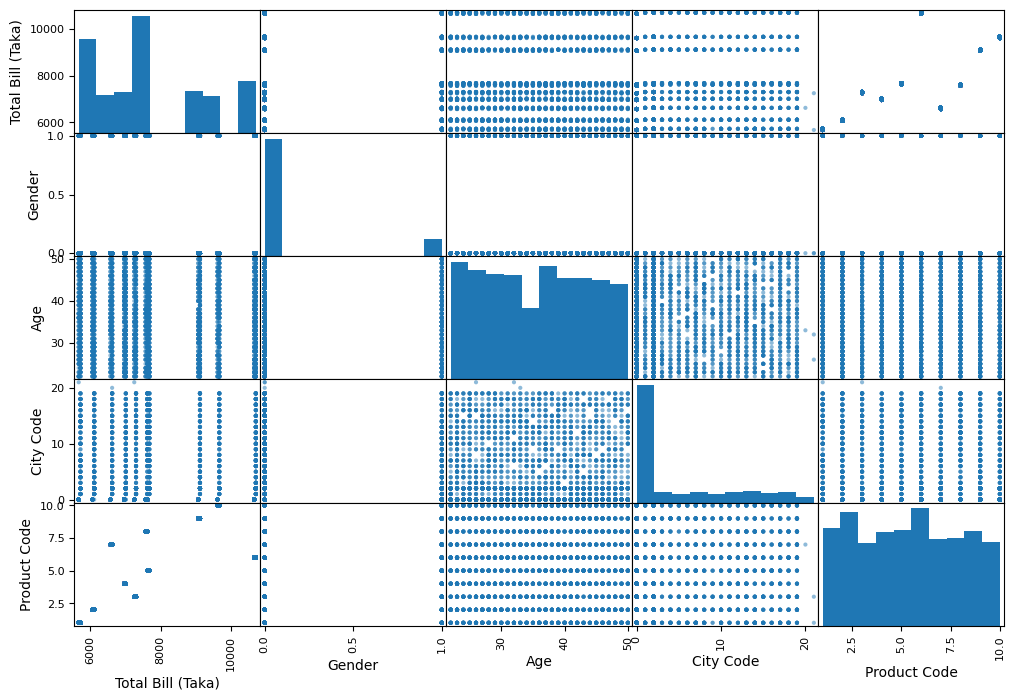

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Total Bill (Taka)", "Gender", "Age", "City Code", "Product Code"]
scatter_matrix(df[attributes], figsize = (12,8))

<Axes: xlabel='Product Code', ylabel='Total Bill (Taka)'>

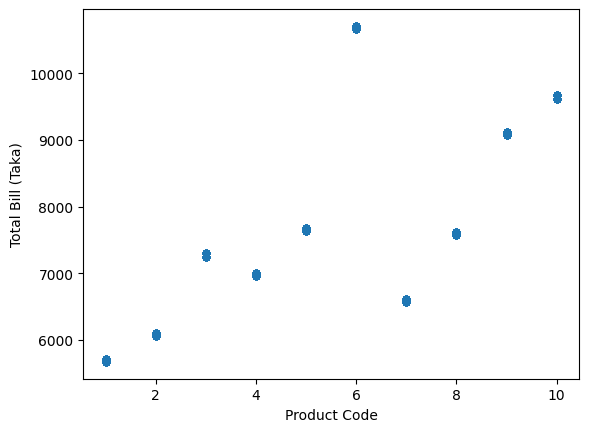

In [ ]:
df.plot(kind="scatter", x="Product Code", y="Total Bill (Taka)", alpha=0.8)